# State of Data Science: exploring the Kaggle 2017 Survey

The 2017 Kaggle Machine Learing and Data Science Survey is divided in three datasets:

- ___multipleChoiceResponses.csv:___ contains all multiple choice responses and is non-randomized, so each row corresponds to a single user entry
- ___freeformResponses.csv:___ contains all freeform answers in a randomized way, so on a given row all answers do not correspond to a single user entries
- ___conversionRates.csv:___ contains the conversion rate from all currencies to USD

This analysis will focus on the multiple choice questions, since each observation on a row corresponds to the same user.

What we know about the dataset (from the kaggle overview): 

- There are over 16000 respondants on 171 countries
- Countries that had less than 50 respondants were grouped on the 'Other' category

In [72]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [87]:
schema = pd.read_csv('../data/schema.csv')
multiple_choice_df = pd.read_csv('../data/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
conversion_rates = pd.read_csv('../data/conversionRates.csv')

In [45]:
schema['Asked'].unique()

array(['All', 'Non-worker', 'Non-switcher', 'Worker1', 'Learners',
       'OnlineLearners', 'Worker', 'CodingWorker-NC', 'CodingWorker'],
      dtype=object)

## Basic General Analysis

Total number of survey-takers: 16716
Total number of accounted countries: 52
Total number of not accounted countries (less than 50 survey-takers): 119

Country with highest number of survey-takers: United States with 4197 survey-takers



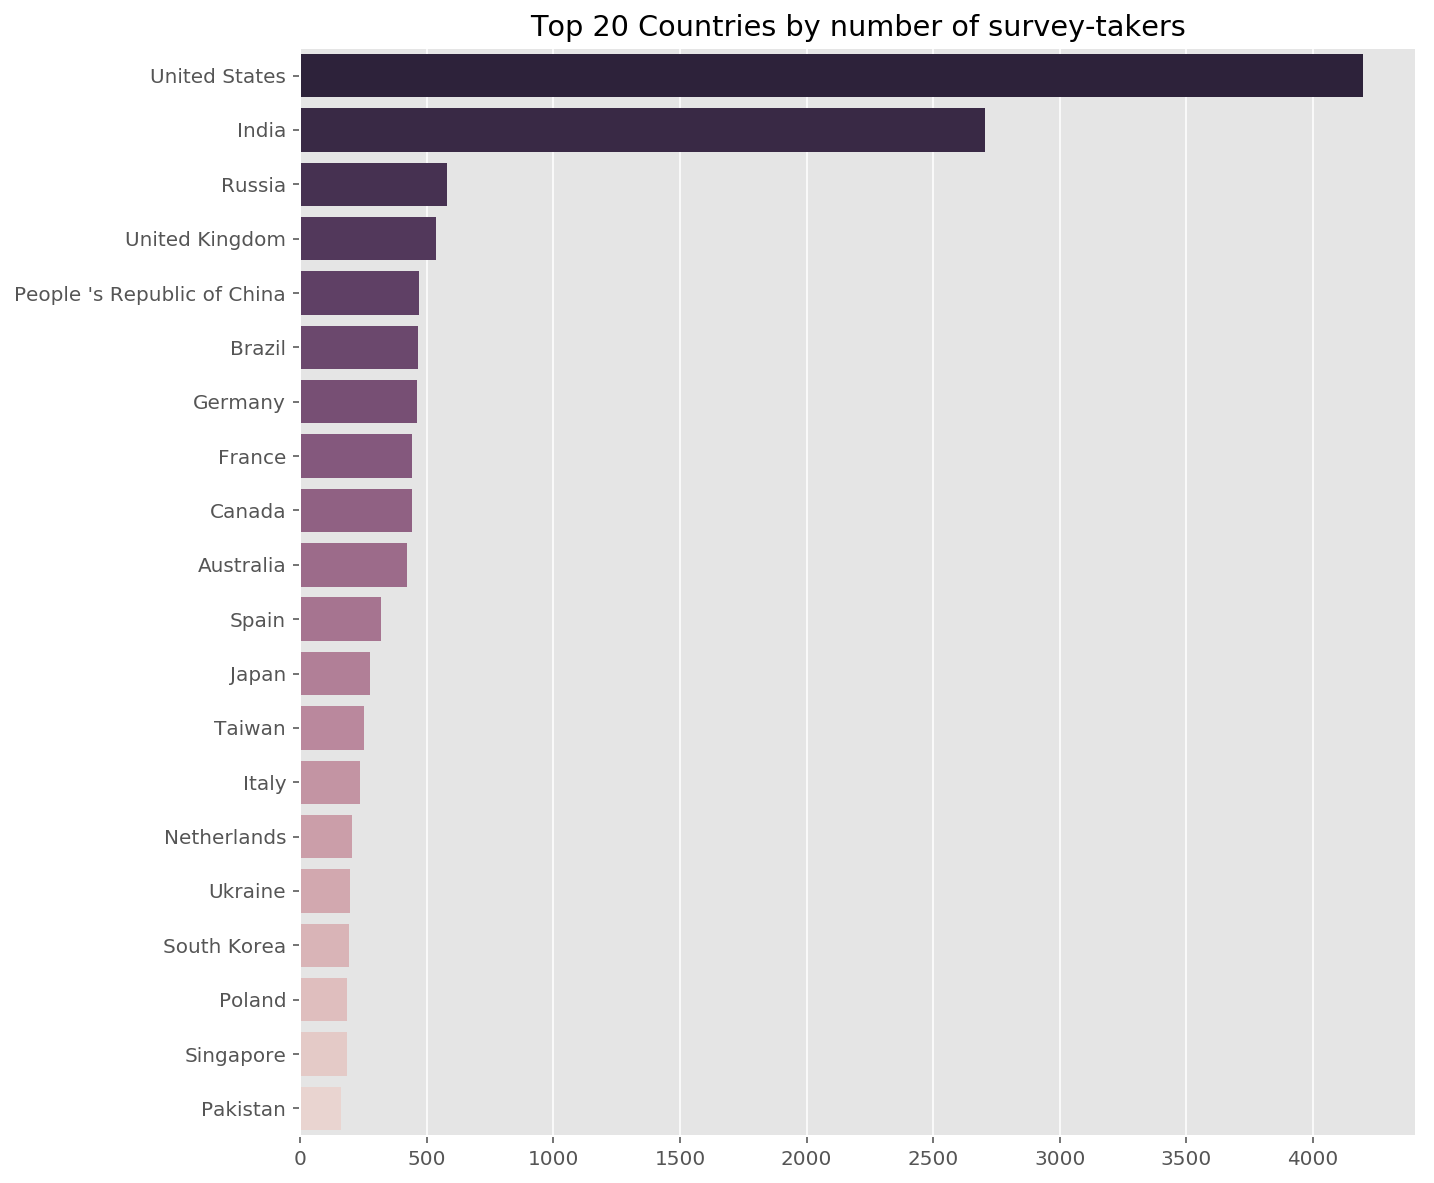

In [111]:
# Number of survey takers and accounted/non-accounted countries
print('Total number of survey-takers:', multiple_choice_df.shape[0])
print('Total number of accounted countries:', multiple_choice_df.Country.nunique())
print('Total number of not accounted countries (less than 50 survey-takers):', 171 - multiple_choice_df.Country.nunique())

# Exploring the survey-takers number
print('\nCountry with highest number of survey-takers:', multiple_choice_df.Country.value_counts().index[0], 'with', \
      multiple_choice_df.Country.value_counts().values[0], 'survey-takers\n')

# Exclude 'Other' as country choice
no_other = multiple_choice_df[multiple_choice_df['Country'] != 'Other']

# Plotting top 20 countries by number of survey-takers
countries = no_other.Country.value_counts()[:20].to_frame()
sns.barplot(countries.Country, countries.index, palette = sns.cubehelix_palette(20, reverse=True))
plt.title('Top 20 Countries by number of survey-takers')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [115]:
# Minimum and maximum ages
print('Youngest survey-taker:', multiple_choice_df.Age.min(), 'and Oldest survey-taker:', multiple_choice_df.Age.max())

# Exploring 
print('\nMean age:', round(multiple_choice_df.Age.mean(), 2))
print('Median age:', multiple_choice_df.Age.median())
print('Most frequent age:', multiple_choice_df.Age.mode()[0])



Youngest survey-taker: 0.0 and Oldest survey-taker: 100.0

Mean age: 32.37
Median age: 30.0
Most frequent age: 25.0


In [113]:
multiple_choice_df.Age.mode()[0]

25.0

In [47]:
multiple_choice_df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Gender Gap Analysis

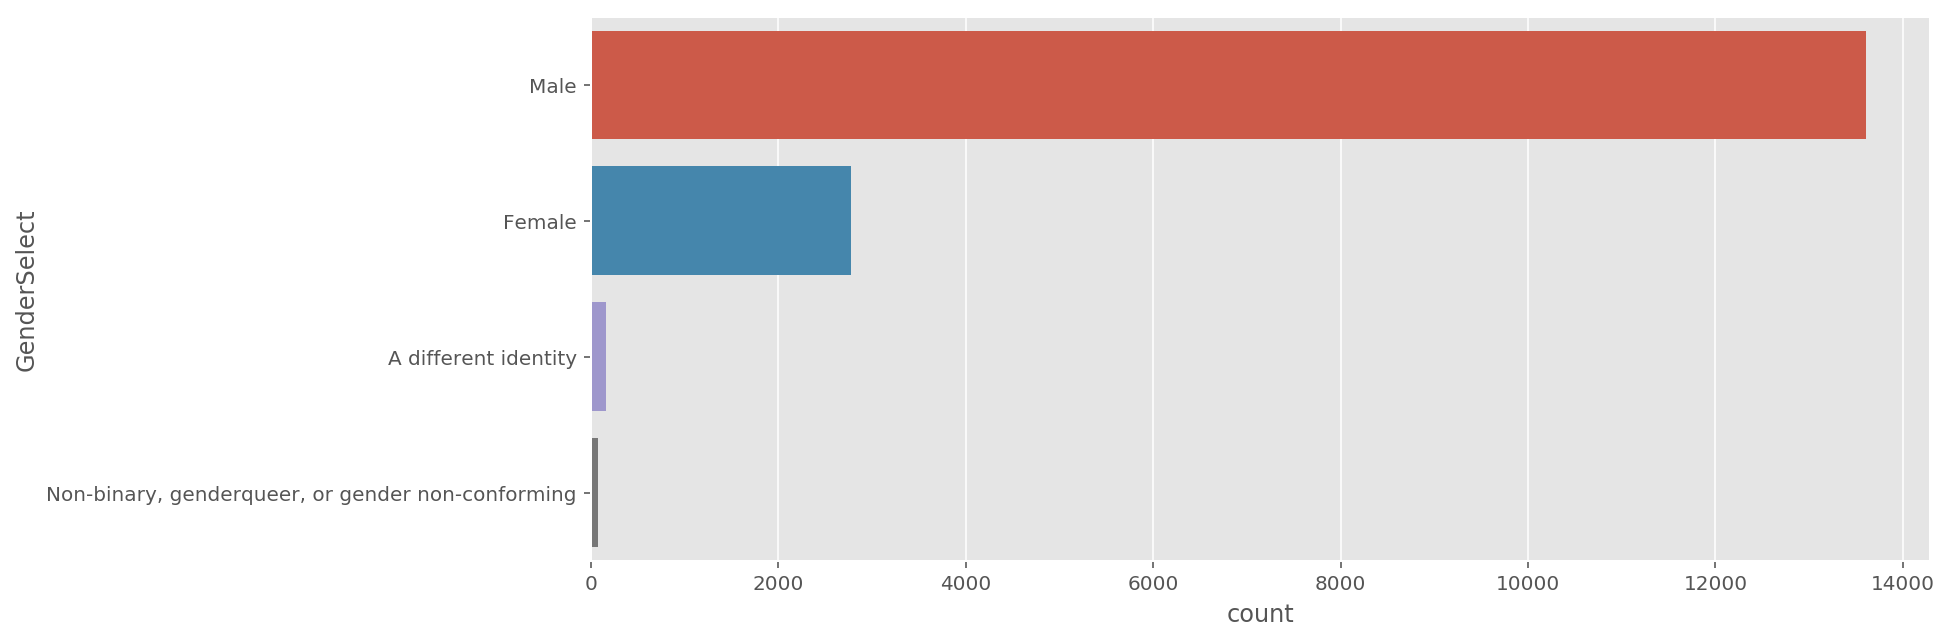

In [96]:
plt.subplots(figsize=(12,5))
sns.countplot(y=multiple_choice_df['GenderSelect'],order=multiple_choice_df['GenderSelect'].value_counts().index)
plt.show()

In [116]:
multiple_choice_df


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
